### <center>Лабораторна робота 1.3-1.4</center>

In [76]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('./titanic_train.csv')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

### Перевірка, що дані завнтажуються із файлу

In [72]:
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 1. Скільки чоловіків / жінок знаходилося на борту?

In [7]:
data.groupby('Sex')['Sex'].value_counts()

Sex
female    314
male      577
Name: count, dtype: int64

### 2. Виведіть розподіл змінної Pclass (соціально-економічний статус) і цей же розподіл, тільки для чоловіків / жінок окремо. Скільки було чоловіків 2-го класу?

In [11]:
data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Sex'].value_counts()

Sex
male    108
Name: count, dtype: int64

### 3. Які значення медіани і стандартного відхилення платежів (Fare)? Виконайте округлення до 2 десяткових знаків.

In [14]:
round(data['Fare'].median(), 2)

14.45

In [15]:
round(data['Fare'].std(), 2)

49.69

### 4. Чи правда, що люди молодші 30 років виживали частіше, ніж люди старші 60 років? Яка частка виживших в обох групах?

In [34]:
# В таблиці всього 891 значень, при цьому є порожні значення та NaN, що є причиною зменшення значень колонок Age=714 Cabin=204,тому вести фільтрації краще за колоонкою Age
# Виживші позначаються значенням 1, хто не вижив значенням 0 в колонці Survived       

total = data.count()
total

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [52]:
filter_data_30 = data[(data['Age'] < 30) & (data['Survived'] == 1)]['Age'].count()

# Кількість виживших старше 60 років
filter_data_60 = data[(data['Age'] > 60) & (data['Survived'] == 1)]['Age'].count()

# Розрахунок частки виживших серед УСІХ
part_30 = (filter_data_30 / data['PassengerId'].count()) * 100
part_60 = (filter_data_60 / data['PassengerId'].count()) * 100

print(f'Частка виживших менше 30 років = {part_30}, старше 60 = {part_60}')

Частка виживших менше 30 років = 17.50841750841751, старше 60 = 0.5611672278338945


In [58]:
# Оскільки серед варіантів віповіді відсутній варіант, тому можливо тут запитують СЕРЕДНЮ ЧАСТКУ

under_30 = data[data['Age'] < 30]
over_60 = data[data['Age'] > 60]

survival_rate_under_30 = under_30['Survived'].mean()*100
survival_rate_over_60 = over_60['Survived'].mean()*100

print(f'Середня частка виживших менше 30 років = {survival_rate_under_30}, старше 60 = {survival_rate_over_60}')

Середня частка виживших менше 30 років = 40.625, старше 60 = 22.727272727272727


### 5. Чи правда, що жінки виживали частіше чоловіків? Яка частка виживших в обох групах?

In [59]:
female = data[data['Sex'] == 'female']
male = data[data['Sex'] == 'male']

survival_rate_female = female['Survived'].mean()*100
survival_rate_male = male['Survived'].mean()*100

print(f'Середня частка жінок = {survival_rate_female}, чоловіків = {survival_rate_male}')

Середня частка жінок = 74.20382165605095, чоловіків = 18.890814558058924


### 6. Знайдіть найбільш популярні імена серед пасажирів Титаніку чоловічої статі

In [66]:
male_passengers = data[data['Sex'] == 'male']

male_passengers['Name'] = male_passengers['Name'].str.split(',').str.get(1)

popular_names = male_passengers['Name'].value_counts()

most_common_count = popular_names.max()

most_common_names = popular_names[popular_names == most_common_count].index.tolist()

most_common_names

C:\Users\Богдан\AppData\Local\Temp\ipykernel_12592\1542951089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_passengers['Name'] = male_passengers['Name'].str.split(',').str.get(1)


7

### 7. Порівняйте графічно розподіли вартості білетів і віку у врятованих та загиблих. Середній вік загиблих вище, правильно?

##### Частина 1: середній вік пасажирів

In [78]:
data['Age'].mean()

29.69911764705882

##### Частина 2: побудова графіку

c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

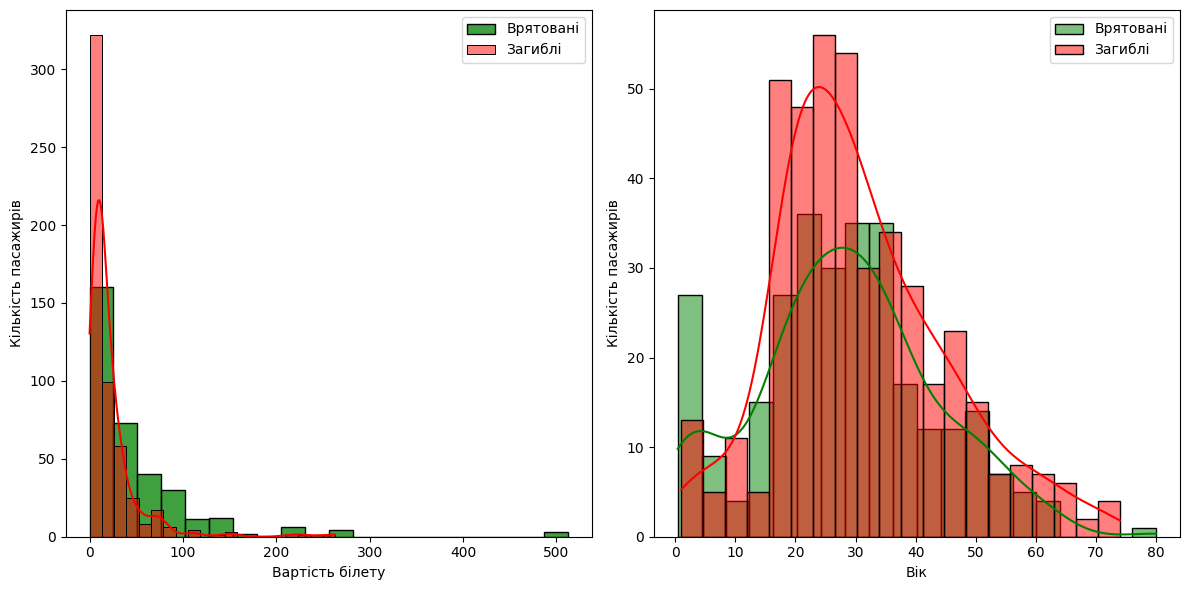

In [86]:
df = pd.DataFrame(data)

survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

# Створити графік
plt.figure(figsize=(12, 6))

# Графік для розподілу вартості білетів
plt.subplot(1, 2, 1)
sns.histplot(survived['Fare'], bins=20, kde=True, label='Врятовані', color='green')
sns.histplot(not_survived['Fare'], bins=20, kde=True, label='Загиблі', color='red')
plt.xlabel('Вартість білету')
plt.ylabel('Кількість пасажирів')
plt.legend()

# Графік для розподілу віку
plt.subplot(1, 2, 2)
sns.histplot(survived['Age'], bins=20, kde=True, label='Врятовані', color='green')
sns.histplot(not_survived['Age'], bins=20, kde=True, label='Загиблі', color='red')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.legend()

plt.tight_layout()
plt.show()

##### Найбільша кількість загиблих: приблизно 25 років, 2ге місце посідає від 25 до 30 років, тобто 29 років. На відповідь завдання більше смертність припадає на середній вік із усієї кількості пасажирів

### 8. Як відрізняється середній вік чоловіків / жінок в залежності від класу обслуговування?

In [82]:
# Відображення групування жінок-чоловіків по класах і визначення їхнього середнього арефметичного значення віку
data.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [83]:
# #Відображення по класах і визначення їхнього середнього арефметичного значення віку
data.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

##### В середньому чоловіки 1-го класу старші 40 років - Правда
##### В середньому жінки 1-го класу старші 40 років - Брехня
##### Чоловіки всіх класів в середньому старші жінок того ж класу - Правда
##### В середньому люди в 1 класі старші, ніж в 2-му, а також старші представників 3-го класу - Правда